In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise = 20, random_state=13)

In [14]:
X.shape

(100, 1)

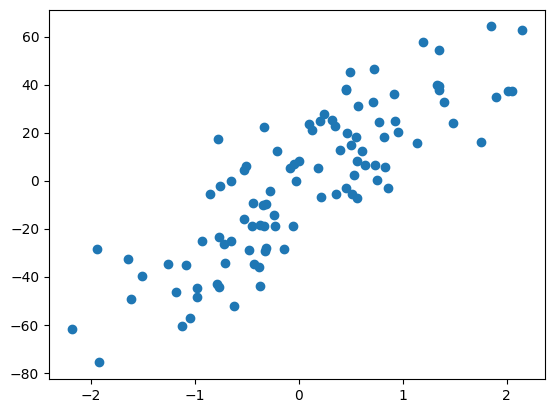

In [5]:
plt.scatter(X,y)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [16]:
import time

b = 150
m= 27.82
all_b = []
all_m=[]
all_cost=[]
all_lr=[]
 
epochs = 1

t0,t1 = 5,50
t=0

def learning_rate(t):
    return t0/(t+t1)

start = time.time()

for i in range(epochs):
    for j in range(X.shape[0]):
        lr = learning_rate(t)
        
        idx = np.random.randint(X.shape[0], size=1)
        slope_b = -2* (y[idx] - (m*X[idx])-b)
        slope_m = -2* (y[idx] - (m*X[idx]))-b * X[idx]
        cost = (y[idx] - m*X[idx]) **2 
        
        b = b - (lr * slope_b)
        m = m - (lr * slope_m)
        
        all_b.append(b)
        all_m.append(m)
        all_cost.append(cost)
        all_lr.append(lr)
        t+=1

print("Total time taken ", time.time()-start)

Total time taken  0.00451207160949707


In [12]:
len(all_lr)

100

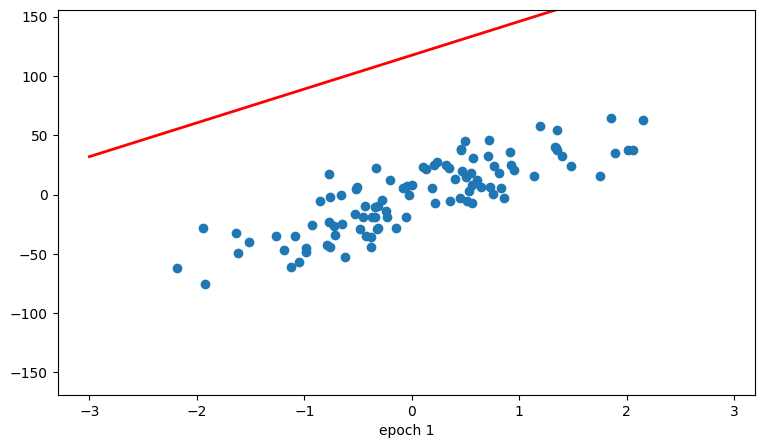

In [13]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, frames=100, interval=5)

f = r"stochastic_animation_line_plot.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

In [17]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

In [19]:
X,y = load_diabetes(return_X_y=True)

In [20]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [23]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [24]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [25]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train,y_train)
 
y_pred = sgd.predict(X_test)
y_pred

/Users/shushantkumartiwar/Music/100_days_machine_learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([154.31193952, 184.07838838, 145.50605649, 116.17550278,
       224.50092579, 218.78683691, 110.91142872, 119.01601185,
        99.46993019, 179.77875367, 164.96240405, 169.28751801,
       181.4469194 , 156.85133202, 226.77528141, 102.96315995,
       175.9510099 , 137.03630947, 144.15139563, 143.70918366,
       128.96160474, 192.59387125, 170.71161824, 176.20661467,
       129.57463747, 209.89487761, 186.47176591, 132.85729948,
        78.75092919, 231.0187516 , 223.09916372, 126.17581082,
        88.22735988, 121.46512176, 191.52538987, 165.68563274,
       167.04795572, 191.93815468, 121.17422036, 219.62366131,
       135.59982764, 132.55596879, 180.87742693, 181.52165761,
       165.94225431, 148.2991403 , 171.63481459, 253.14628296,
       126.40885305, 192.03171733, 217.61203764, 128.57677913,
       141.67673212, 159.71815296, 183.64638087, 125.45158256,
       165.19448124,  98.61208022, 157.4390704 , 140.44534741,
       162.49432254, 172.72880696, 119.83537687, 190.19

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y_test,y_pred)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

